## Questão 3 – Análise de Dados com SOM (Índices de Desenvolvimento)

Considere a tabela de **índices de desenvolvimento de países** apresentada abaixo.  
Essa questão foi extraída do livro:

> *MINGOTI, Sueli A. – Análise de Dados através de Métodos de Estatística Multivariada*

A tabela contém os seguintes atributos para cada país:

- **Expectativa de Vida**
- **Educação**
- **PIB**
- **Estabilidade Política**

### Dados da Tabela

| País            | Expectativa de Vida | Educação | PIB  | Estabilidade Política |
|-----------------|---------------------|----------|------|------------------------|
| Reino Unido     | 0.88                | 0.99     | 0.91 | 1.10                   |
| Austrália       | 0.90                | 0.99     | 0.93 | 1.26                   |
| Canadá          | 0.90                | 0.98     | 0.94 | 1.24                   |
| Estados Unidos  | 0.87                | 0.98     | 0.97 | 1.18                   |
| Japão           | 0.93                | 0.93     | 0.90 | 1.20                   |
| França          | 0.89                | 0.97     | 0.85 | 1.04                   |
| Cingapura       | 0.88                | 0.87     | 0.83 | 1.41                   |
| Argentina       | 0.81                | 0.92     | 0.70 | 0.55                   |
| Uruguai         | 0.82                | 0.92     | 0.65 | 1.05                   |
| Cuba            | 0.75                | 0.90     | 0.40 | 0.07                   |
| Colômbia        | 0.77                | 0.75     | 0.69 | 0.50                   |
| Brasil          | 0.80                | 0.73     | 0.82 | 0.70                   |
| Paraguai        | 0.75                | 0.70     | 0.60 | 0.40                   |
| Egito           | 0.70                | 0.62     | 0.60 | 0.21                   |
| Nigéria         | 0.44                | 0.58     | 0.37 | -1.36                  |
| Senegal         | 0.47                | 0.37     | 0.45 | -0.68                  |
| Serra Leoa      | 0.23                | 0.33     | 0.27 | -1.56                  |
| Angola          | 0.34                | 0.36     | 0.51 | -1.98                  |
| Etiópia         | 0.31                | 0.35     | 0.32 | -2.00                  |
| Moçambique      | 0.24                | 0.37     | 0.20 | -3.00                  |
| China           | 0.80                | 0.98     | 0.95 | 1.09                   |

---

### Tarefa

Utilize uma **Self-Organizing Map (SOM)** para os dados da tabela e, com isso, **identifique os clusters existentes**, ou seja, **grupos de países com características mais similares**.

> Dica: é recomendável **normalizar os dados** antes de treinar o SOM.

---

### Objetivo Final

- Obter uma **representação 2D** dos dados dos países com base nos quatro indicadores.
- **Visualizar** os agrupamentos com base na posição dos países no mapa de neurônios.
- Interpretar os **clusters formados** como agrupamentos socioeconômicos.



In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=4b45d1ef285e418943ec7ea9adc5e1240bc70ae37de78ed6bfbb4d8019050b5f
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


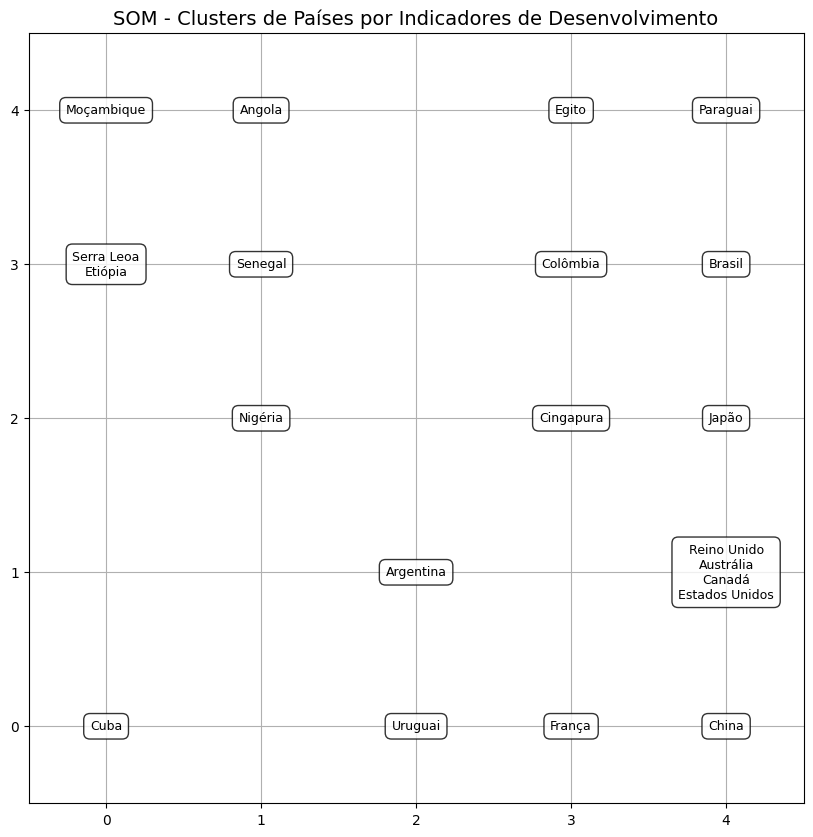

In [ ]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Países e dados
paises = [
    'Reino Unido', 'Austrália', 'Canadá', 'Estados Unidos', 'Japão', 'França',
    'Cingapura', 'Argentina', 'Uruguai', 'Cuba', 'Colômbia', 'Brasil',
    'Paraguai', 'Egito', 'Nigéria', 'Senegal', 'Serra Leoa', 'Angola', 'Etiópia', 'Moçambique', 'China'
]

dados = np.array([
    [0.88, 0.99, 0.91, 1.10],
    [0.90, 0.99, 0.93, 1.26],
    [0.90, 0.98, 0.94, 1.24],
    [0.87, 0.98, 0.97, 1.18],
    [0.93, 0.93, 0.90, 1.20],
    [0.89, 0.97, 0.85, 1.04],
    [0.88, 0.87, 0.83, 1.41],
    [0.81, 0.92, 0.70, 0.55],
    [0.82, 0.92, 0.65, 1.05],
    [0.75, 0.90, 0.40, 0.07],
    [0.77, 0.75, 0.69, 0.50],
    [0.80, 0.73, 0.82, 0.70],
    [0.75, 0.70, 0.60, 0.40],
    [0.70, 0.62, 0.60, 0.21],
    [0.44, 0.58, 0.37, -1.36],
    [0.47, 0.37, 0.45, -0.68],
    [0.23, 0.33, 0.27, -1.56],
    [0.34, 0.36, 0.51, -1.98],
    [0.31, 0.35, 0.32, -2.0],
    [0.24, 0.37, 0.20, -3.0],
    [0.80, 0.98, 0.95, 1.09]
])

# Normalização
scaler = MinMaxScaler()
dados_norm = scaler.fit_transform(dados)

# SOM 5x5
som = MiniSom(x=5, y=5, input_len=4, sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(dados_norm, 1000)

# Criar mapa de neurônios
plt.figure(figsize=(10, 10))
plt.title("SOM - Clusters de Países por Indicadores de Desenvolvimento", fontsize=14)

# Cores (opcional, poderia agrupar por continente se quiser)
cores = plt.cm.tab20(np.linspace(0, 1, len(paises)))

# Mapear países nos neurônios vencedores
posicoes = {}
for i, x in enumerate(dados_norm):
    w = som.winner(x)
    pos = (w[0], w[1])
    posicoes.setdefault(pos, []).append(paises[i])

# Desenhar neurônios com múltiplos países
for pos, nomes in posicoes.items():
    texto = "\n".join(nomes)
    plt.text(pos[0], pos[1], texto,
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'),
             ha='center', va='center', fontsize=9)

# Extraindo tamanho da grade SOM
x_size, y_size = som._weights.shape[0], som._weights.shape[1]

# Visual
plt.xlim(-0.5, x_size - 0.5)
plt.ylim(-0.5, y_size - 0.5)
plt.xticks(range(x_size))
plt.yticks(range(y_size))
plt.grid(True)
#plt.gca().invert_yaxis()
plt.show()

